In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('sample_data/data.csv')
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
data_title=data.song_title
#print (data_title[1])
data_singer=data.artist
data_energy=data.energy
data_danceability=data.danceability
data_ins=data.instrumentalness
data_c=[]
data_n=[]

def check_same_song():
  for i in range(0,len(data_title)):
    data_c.append(str(data_title[i])+str(data_singer[i])+str(data_energy[i])+str(data_danceability[i])+str(data_ins[i]))
  if len(set(data_c))==len(data_c) :
    print ('no same song in dataset')
  else:
    print ('there is same song in dataset')

check_same_song()

print ('repeated songs: '+str(-2*(len(set(data_c))-len(data_c))))
#print (data_c)
for  i in range(0,len(data_title)):
  for j in range(i+1,len(data_title)):
    if data_c[i]==data_c[j]:
      #print (data_c[i])
      data_n.append(data_c[i])

#print (data_n)
data_c=[]
data_n=[]
for i in range(0,len(data_title)):
  for j in range(0,len(data_n)):
    b=(str(data_title[i])+str(data_singer[i])+str(data_energy[i])+str(data_danceability[i])+str(data_ins[i])==data_n[j])
    if b==True:
      data=data.drop([i])

print ("dataset check finished. No same records anymore")

there is same song in dataset
repeated songs: 18
dataset check finished. No same records


In [ ]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb28d20c1d0>]],
      dtype=object)

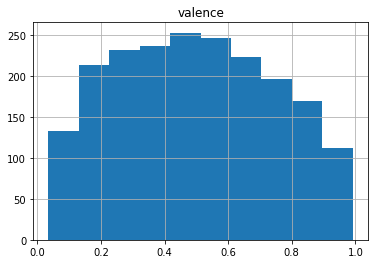

In [ ]:
data.hist("valence")

# New Section

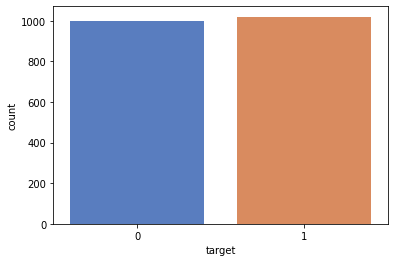

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="target", data=data, palette="muted");

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

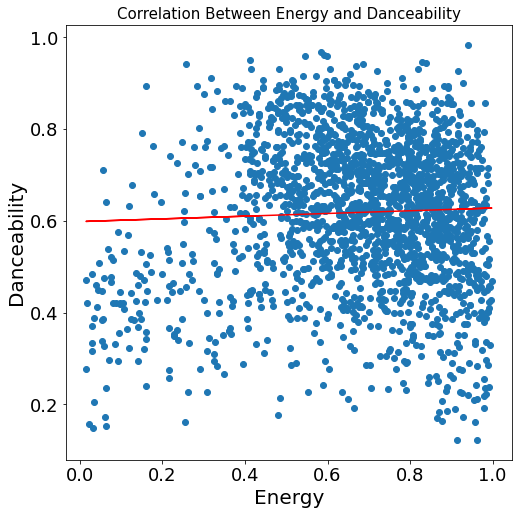

In [ ]:
x = data.energy
y = data.danceability
from scipy.stats import linregress
stats = linregress(x,y)

m = stats.slope
b = stats.intercept
plt.figure(figsize=(8,8))
plt.title("Correlation Between Energy and Danceability", fontsize = 15)
plt.scatter(x, y)
plt.plot(x, m*x+b, color="red")
plt.xlabel("Energy", fontsize=20)
plt.ylabel("Danceability", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

<Figure size 576x360 with 0 Axes>

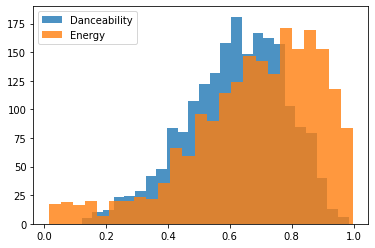

In [ ]:
fig = plt.figure(figsize=(8,5))
fig,ax = plt.subplots()
plt.style.use('seaborn-pastel')
ax.hist(y,bins = 25,alpha = 0.8,label = "Danceability")
ax.hist(x,bins = 25,alpha = 0.8,label = "Energy")
ax.legend()

In [ ]:
data.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [ ]:
data.head(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
data_new=data.drop(['artist','song_title','target','Unnamed: 0'],1)
data_new.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_new, data['target'], test_size=0.3, random_state=0)
from sklearn.preprocessing import MinMaxScaler
 
x_scaler = MinMaxScaler()

x_scaler.fit(X_train)
 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)
X_train.head()
#X_test.head()
#y_train.head()
#y_test.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1047,0.0915,0.533,230722,0.533,0.000000,0,0.0972,-8.266,1,0.0324,159.907,4.0,0.506
1437,0.5880,0.614,179613,0.792,0.000000,5,0.1050,-3.528,0,0.3520,154.823,4.0,0.554
862,0.0164,0.653,373333,0.875,0.031100,9,0.3770,-5.232,1,0.1250,116.956,4.0,0.796
108,0.4880,0.251,126827,0.868,0.000007,1,0.8180,-2.685,1,0.1280,177.125,4.0,0.587
1501,0.0261,0.555,174467,0.645,0.000000,4,0.0790,-5.799,0,0.0637,140.911,4.0,0.195


In [ ]:
X_test.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
145,0.937000,0.772,220093,0.635,0.0180,0,0.0961,-8.412,1,0.0536,168.039,4.0,0.592
557,0.098500,0.647,277375,0.841,0.0000,10,0.8970,-2.507,1,0.1640,139.963,4.0,0.886
240,0.063900,0.742,256693,0.945,0.1650,5,0.1310,-6.445,1,0.0428,112.977,4.0,0.748
893,0.000624,0.906,311365,0.648,0.0857,11,0.2720,-8.742,0,0.0734,123.980,4.0,0.646
1518,0.859000,0.456,243013,0.257,0.4750,10,0.1110,-16.877,0,0.0298,104.311,4.0,0.171


In [ ]:
print(y_test)

145     1
557     1
240     1
893     1
1518    0
       ..
1926    0
210     1
895     1
838     1
711     1
Name: target, Length: 606, dtype: int64


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
accuracy_buffer=[]
def buffer_clean():
  accuracy_buffer=[]

def evaluate_on_training_set(y_test, y_pred):
  # Calculate AUC
  print("AUC is: ", roc_auc_score(y_test, y_pred))#todo print AUC score)
  #accuracy_buffer.append(float(format(roc_auc_score(y_test, y_pred),'.3f')))
  accuracy_buffer.append(float(roc_auc_score(y_test, y_pred)))

  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

  # # calculate points for ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  
  
  # Plot ROC curve
  #plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
  #plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  #plt.xlim([0.0, 1.0])
  #plt.ylim([0.0, 1.0])
  #plt.xlabel('False Positive Rate or (1 - Specifity)')
  #plt.ylabel('True Positive Rate or (Sensitivity)')
  #plt.title('Receiver Operating Characteristic')


Logistic regression

AUC is:  0.6552079134574531
              precision    recall  f1-score   support

           0       0.65      0.66      0.65       299
           1       0.66      0.65      0.66       307

    accuracy                           0.66       606
   macro avg       0.66      0.66      0.66       606
weighted avg       0.66      0.66      0.66       606

Confusion Matrix: 
 [[198 101]
 [108 199]]
AUC is:  0.6504090725872342
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       299
           1       0.66      0.63      0.65       307

    accuracy                           0.65       606
   macro avg       0.65      0.65      0.65       606
weighted avg       0.65      0.65      0.65       606

Confusion Matrix: 
 [[200  99]
 [113 194]]
AUC is:  0.6504526488947958
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       299
           1       0.66      0.63      0.65       307

    accuracy

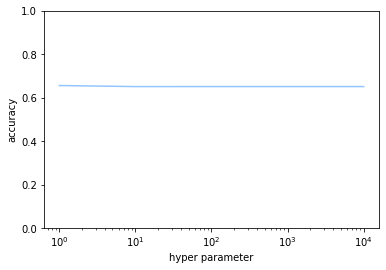

In [ ]:
from sklearn.linear_model import LogisticRegression
accuracy_buffer.clear()
C_list=[1,10,100,1000,10000]
for i in range(0,len(C_list)):
  model = LogisticRegression(C=C_list[i], multi_class='auto', solver='newton-cg')
  model.fit(X_train_norm, y_train)
  y_pred = model.predict(X_test_norm)
  evaluate_on_training_set(y_test, y_pred)

#C      1    10    100    1000   10000
#accuracy  0.66   0.65   0.65    0.65   0.65
plt.plot(C_list,accuracy_buffer)
plt.xlabel('hyper parameter')
plt.ylabel('accuracy')
plt.ylim(0,1)
plt.xscale('log')
print ("---------------------------------------------------------------")
print ('tested hyperparameter:'+str(C_list))
print("Maximum accuracy:"+str(max(accuracy_buffer)))
print("C value:"+str(C_list[accuracy_buffer.index(max(accuracy_buffer))]))
accuracy_buffer.clear()

Decision Trees

AUC is:  0.6519941607747868
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       299
           1       0.66      0.64      0.65       307

    accuracy                           0.65       606
   macro avg       0.65      0.65      0.65       606
weighted avg       0.65      0.65      0.65       606

Confusion Matrix: 
 [[199 100]
 [111 196]]
AUC is:  0.7068894142254856
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       299
           1       0.68      0.79      0.73       307

    accuracy                           0.71       606
   macro avg       0.71      0.71      0.71       606
weighted avg       0.71      0.71      0.71       606

Confusion Matrix: 
 [[188 111]
 [ 66 241]]
AUC is:  0.7008976719357685
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       299
           1       0.69      0.73      0.71       307

    accuracy

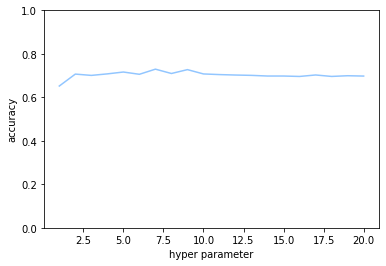

In [ ]:
from sklearn import tree
accuracy_buffer.clear()
depth_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in range(0,len(depth_list)):
  model = tree.DecisionTreeClassifier(max_depth=depth_list[i], min_samples_leaf=1)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  evaluate_on_training_set(y_test, y_pred)

plt.plot(depth_list,accuracy_buffer)
plt.xlabel('hyper parameter')
plt.ylabel('accuracy')
plt.ylim(0,1)
print ("---------------------------------------------------------------")
print ('tested hyperparameter:'+str(depth_list))
print("Maximum accuracy:"+str(max(accuracy_buffer)))
print("depth value:"+str(depth_list[accuracy_buffer.index(max(accuracy_buffer))]))
accuracy_buffer.clear()
#depth   3   4   5   6   7   8   9   10
#accuracy 0.70  0.71 0.72 0.71  0.73  0.71  0.73  0.71

[Text(641.0105202151335, 635.1536842105263, 'X[4] <= 0.0\ngini = 0.5\nsamples = 1411\nvalue = [698, 713]'),
 Text(426.2278653560831, 600.821052631579, 'X[9] <= 0.124\ngini = 0.466\nsamples = 714\nvalue = [450, 264]'),
 Text(256.3726446587537, 566.4884210526316, 'X[1] <= 0.779\ngini = 0.397\nsamples = 528\nvalue = [384, 144]'),
 Text(100.78564540059348, 532.1557894736843, 'X[1] <= 0.406\ngini = 0.35\nsamples = 455\nvalue = [352, 103]'),
 Text(29.141839762611276, 497.8231578947369, 'X[9] <= 0.038\ngini = 0.499\nsamples = 40\nvalue = [19, 21]'),
 Text(10.597032640949555, 463.4905263157895, 'X[2] <= 221433.5\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(5.298516320474778, 429.15789473684214, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(15.895548961424332, 429.15789473684214, 'X[12] <= 0.067\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(10.597032640949555, 394.82526315789477, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(21.19406528189911, 394.82526315789477, 'gini 

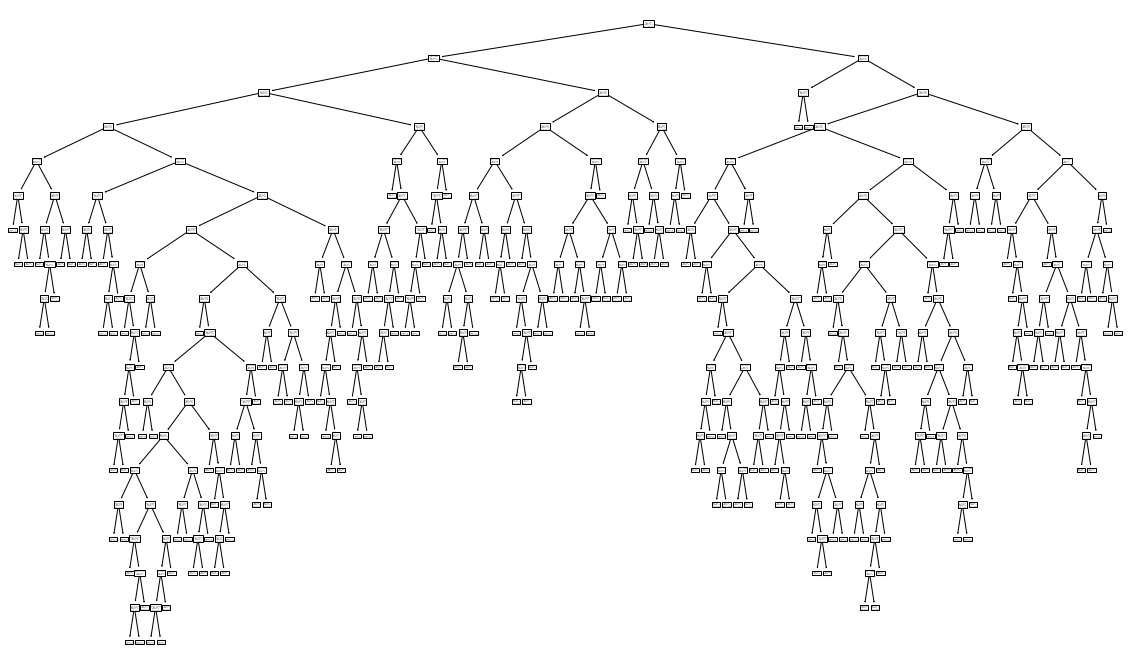

In [ ]:
plt.figure(figsize=(20,12))
tree.plot_tree(model)

K Nearest Neighbor Classifier

AUC is:  0.6244375932805334
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       299
           1       0.64      0.57      0.61       307

    accuracy                           0.62       606
   macro avg       0.63      0.62      0.62       606
weighted avg       0.63      0.62      0.62       606

Confusion Matrix: 
 [[202  97]
 [131 176]]
AUC is:  0.6168879979954899
              precision    recall  f1-score   support

           0       0.57      0.85      0.68       299
           1       0.72      0.39      0.50       307

    accuracy                           0.61       606
   macro avg       0.65      0.62      0.59       606
weighted avg       0.65      0.61      0.59       606

Confusion Matrix: 
 [[253  46]
 [188 119]]
AUC is:  0.6475875066726221
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       299
           1       0.67      0.59      0.63       307

    accuracy

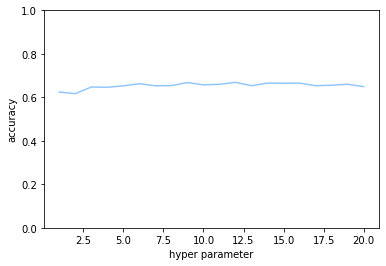

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_buffer.clear()
neigh_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for i in range(0,len(neigh_list)):
  model = KNeighborsClassifier(n_neighbors=neigh_list[i])
  model.fit(X_train_norm, y_train)
  y_pred = model.predict(X_test_norm)
  evaluate_on_training_set(y_test, y_pred)

#Neighbours  1  2   3  4   5  6   7  8  9  10
#accuracy  0.62 0.61 0.65 0.64 0.65 0.66 0.65 0.65 0.67 0.66
plt.plot(neigh_list,accuracy_buffer)
plt.xlabel('hyper parameter')
plt.ylabel('accuracy')
plt.ylim(0,1)
print ("---------------------------------------------------------------")
print ('tested hyperparameter:'+str(neigh_list))
print("Maximum accuracy:"+str(max(accuracy_buffer)))
print("neighbour value:"+str(depth_list[accuracy_buffer.index(max(accuracy_buffer))]))
accuracy_buffer.clear()

Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
evaluate_on_training_set(y_test, y_pred)

AUC is:  0.6330330199470549
              precision    recall  f1-score   support

           0       0.64      0.59      0.61       299
           1       0.63      0.68      0.65       307

    accuracy                           0.63       606
   macro avg       0.63      0.63      0.63       606
weighted avg       0.63      0.63      0.63       606

Confusion Matrix: 
 [[175 124]
 [ 98 209]]


SVM

AUC is:  0.6093710849411175
              precision    recall  f1-score   support

           0       0.58      0.77      0.66       299
           1       0.67      0.45      0.54       307

    accuracy                           0.61       606
   macro avg       0.62      0.61      0.60       606
weighted avg       0.62      0.61      0.60       606

Confusion Matrix: 
 [[230  69]
 [169 138]]
AUC is:  0.6554966064950486
              precision    recall  f1-score   support

           0       0.61      0.81      0.70       299
           1       0.73      0.50      0.59       307

    accuracy                           0.65       606
   macro avg       0.67      0.66      0.65       606
weighted avg       0.67      0.65      0.65       606

Confusion Matrix: 
 [[242  57]
 [153 154]]
AUC is:  0.704138659810661
              precision    recall  f1-score   support

           0       0.67      0.79      0.72       299
           1       0.75      0.62      0.68       307

    accuracy 

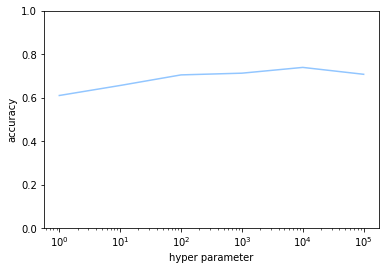

In [ ]:
from sklearn.svm import SVC
accuracy_buffer.clear()
C_list=[1,10,100,1000,10000,100000]

for i in range(0,len(C_list)):
  model = SVC(C=C_list[i], gamma='auto', kernel='poly')
  model.fit(X_train_norm, y_train)
  y_pred = model.predict(X_test_norm)
  evaluate_on_training_set(y_test, y_pred)
plt.plot(C_list,accuracy_buffer)
plt.xlabel('hyper parameter')
plt.ylabel('accuracy')
plt.xscale('log')
plt.ylim(0,1)
print ("---------------------------------------------------------------")
print ('tested hyperparameter:'+str(C_list))
print("Maximum accuracy:"+str(max(accuracy_buffer)))
print("C value:"+str(C_list[accuracy_buffer.index(max(accuracy_buffer))]))
accuracy_buffer.clear()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
accuracy_buffer.clear()
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [1, 10, 100, 1000]},{'kernel': ['linear'],'C': [1, 10, 100, 1000]},{'kernel': ['poly'],'C': [1, 10, 100, 1000, 10000]}]

# we define the grid search model for SVM: 
clf = GridSearchCV(SVC(), tuned_parameters, cv=2,
                   scoring='roc_auc', verbose=1, n_jobs=4)

# train the model on the training set: 
clf.fit(X_train_norm, y_train)

# Show best parameters: 
print("Best parameter set found on development set:")
print(clf.best_params_, '\n')

y_pred = clf.predict(X_test_norm) #create predictions
evaluate_on_training_set(y_test, y_pred) # evaluate like we always do
print("Tuned parameters: ",tuned_parameters)

Fitting 2 folds for each of 25 candidates, totalling 50 fits
Best parameter set found on development set:
{'C': 1, 'kernel': 'poly'} 

AUC is:  0.7154521586613358
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       299
           1       0.76      0.64      0.70       307

    accuracy                           0.71       606
   macro avg       0.72      0.72      0.71       606
weighted avg       0.72      0.71      0.71       606

Confusion Matrix: 
 [[235  64]
 [109 198]]
Tuned parameters:  [{'kernel': ['rbf'], 'gamma': [0.01, 0.001, 0.0001, 1e-05], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['poly'], 'C': [1, 10, 100, 1000, 10000]}]


Ensemble

AUC is:  0.7197716601483772
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       299
           1       0.74      0.70      0.72       307

    accuracy                           0.72       606
   macro avg       0.72      0.72      0.72       606
weighted avg       0.72      0.72      0.72       606

Confusion Matrix: 
 [[222  77]
 [ 93 214]]
AUC is:  0.7130391206301133
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       299
           1       0.72      0.70      0.71       307

    accuracy                           0.71       606
   macro avg       0.71      0.71      0.71       606
weighted avg       0.71      0.71      0.71       606

Confusion Matrix: 
 [[217  82]
 [ 92 215]]
AUC is:  0.7344296406044033
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       299
           1       0.74      0.73      0.73       307

    accuracy

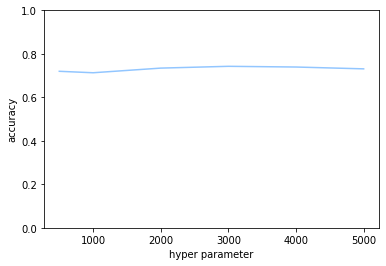

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
accuracy_buffer.clear()
estimator_list=[500,1000,2000,3000,4000,5000]
for i in range(0,len(estimator_list)):
  model = AdaBoostClassifier(n_estimators=estimator_list[i], learning_rate=0.01) # Define the model with parameters
  model.fit(X_train_norm, y_train) # Training the model
  y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
  evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function
plt.plot(estimator_list,accuracy_buffer)
plt.xlabel('hyper parameter')
plt.ylabel('accuracy')
plt.ylim(0,1)
print ("---------------------------------------------------------------")
print ('tested hyperparameter:'+str(estimator_list))
print("Maximum accuracy:"+str(max(accuracy_buffer)))
print("estimator value:"+str(estimator_list[accuracy_buffer.index(max(accuracy_buffer))]))
print("learning rate value: 0.01")
accuracy_buffer.clear()

Random Forest

AUC is:  0.603891364265249
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       299
           1       0.61      0.61      0.61       307

    accuracy                           0.60       606
   macro avg       0.60      0.60      0.60       606
weighted avg       0.60      0.60      0.60       606

Confusion Matrix: 
 [[179 120]
 [120 187]]
AUC is:  0.599005370779907
              precision    recall  f1-score   support

           0       0.59      0.60      0.60       299
           1       0.61      0.60      0.60       307

    accuracy                           0.60       606
   macro avg       0.60      0.60      0.60       606
weighted avg       0.60      0.60      0.60       606

Confusion Matrix: 
 [[179 120]
 [123 184]]
AUC is:  0.5940758009870034
              precision    recall  f1-score   support

           0       0.59      0.60      0.59       299
           1       0.60      0.59      0.60       307

    accuracy  

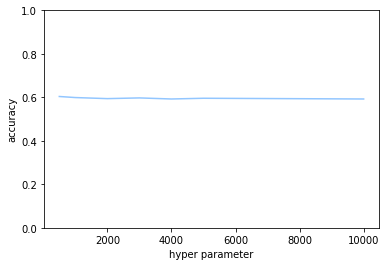

In [ ]:
from sklearn.ensemble import RandomForestClassifier
accuracy_buffer.clear()
estimator_list=[500,1000,2000,3000,4000,5000,10000]
for i in range(0,len(estimator_list)):
  model = RandomForestClassifier(n_estimators = estimator_list[i]) # Define the model
  #TODO fit the model, predict y and evaluate as before
  model.fit(X_train_norm, y_train) # Training the model
  y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
  evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

plt.plot(estimator_list,accuracy_buffer)
plt.xlabel('hyper parameter')
plt.ylabel('accuracy')
plt.ylim(0,1)
print ("---------------------------------------------------------------")
print ('tested hyperparameter:'+str(estimator_list))
print("Maximum accuracy:"+str(max(accuracy_buffer)))
print("estimator value:"+str(estimator_list[accuracy_buffer.index(max(accuracy_buffer))]))
accuracy_buffer.clear()

K-Means

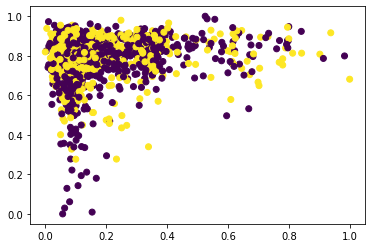

array([[9.19572072e-02, 4.86390533e-01, 2.16726263e-01, ...,
        6.99818875e-01, 7.50000000e-01, 4.92269118e-01],
       [5.90953606e-01, 5.82248521e-01, 1.64998548e-01, ...,
        6.68065705e-01, 7.50000000e-01, 5.42415378e-01],
       [1.64796048e-02, 6.28402367e-01, 3.61063683e-01, ...,
        4.31559553e-01, 7.50000000e-01, 7.95236105e-01],
       ...,
       [1.58508995e-03, 5.63313609e-01, 3.71348702e-01, ...,
        4.19374180e-01, 7.50000000e-01, 1.30589219e-02],
       [6.38192776e-06, 2.40236686e-01, 9.40701733e-02, ...,
        2.97782774e-01, 7.50000000e-01, 1.55871291e-01],
       [2.82384324e-02, 6.13017751e-01, 1.82717484e-01, ...,
        2.50271688e-01, 7.50000000e-01, 6.57333891e-01]])

In [ ]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters = 2, random_state = 9).fit_predict(X_train_norm)
plt.scatter(X_train_norm[:,6], X_train_norm[:,7], c=y_pred)
plt.show()
X_train_norm

PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)
pca.fit(X_train_norm)
X_train_norm=pca.transform(X_train_norm)
X_test_norm=pca.transform(X_test_norm)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
X_train_norm

[0.24561422 0.12878388 0.10038626]
[0.44590675 0.23380406 0.18224885]


array([[-0.47980201,  0.02493267, -0.39332362],
       [ 0.57336406,  0.13097412, -0.14366871],
       [-0.25494677, -0.51540486,  0.2790653 ],
       ...,
       [ 0.56501467,  0.28281025, -0.17054056],
       [-0.42737111, -0.0727349 , -0.22732057],
       [ 0.53793266, -0.11616133, -0.58611303]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 450) # Define the model
#TODO fit the model, predict y and evaluate as before
model.fit(X_train_pca, y_train) # Training the model

y_pred = model.predict(X_test_pca) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

AUC is:  0.5891462311940998
              precision    recall  f1-score   support

           0       0.58      0.59      0.59       299
           1       0.60      0.59      0.59       307

    accuracy                           0.59       606
   macro avg       0.59      0.59      0.59       606
weighted avg       0.59      0.59      0.59       606

Confusion Matrix: 
 [[177 122]
 [127 180]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model.fit(X_train_pca, y_train) # Training the model

y_pred = model.predict(X_test_pca) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

AUC is:  0.6227217761702962
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       299
           1       0.64      0.58      0.61       307

    accuracy                           0.62       606
   macro avg       0.62      0.62      0.62       606
weighted avg       0.62      0.62      0.62       606

Confusion Matrix: 
 [[200  99]
 [130 177]]


In [ ]:
from sklearn.svm import SVC
model = SVC(C=200, gamma='auto', kernel='rbf')
model.fit(X_train_pca, y_train)


y_pred = model.predict(X_test_pca)
evaluate_on_training_set(y_test, y_pred)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [1, 10, 100, 1000]},{'kernel': ['linear'],'C': [1, 10, 100, 1000]},{'kernel': ['poly'],'C': [1, 10, 100, 1000, 10000]}]

# we define the grid search model for SVM: 
clf = GridSearchCV(SVC(), tuned_parameters, cv=2,
                   scoring='roc_auc', verbose=1, n_jobs=4)

# train the model on the training set: 
clf.fit(X_train_pca, y_train)

# Show best parameters: 
print("Best parameter set found on development set:")
print(clf.best_params_, '\n')

y_pred = clf.predict(X_test_pca) #create predictions
evaluate_on_training_set(y_test, y_pred) # evaluate like we always do


AUC is:  0.6536064841545652
              precision    recall  f1-score   support

           0       0.61      0.79      0.69       299
           1       0.72      0.52      0.60       307

    accuracy                           0.65       606
   macro avg       0.67      0.65      0.65       606
weighted avg       0.67      0.65      0.65       606

Confusion Matrix: 
 [[236  63]
 [148 159]]
Fitting 2 folds for each of 25 candidates, totalling 50 fits
Best parameter set found on development set:
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'} 

AUC is:  0.6278692275010077
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       299
           1       0.65      0.57      0.61       307

    accuracy                           0.63       606
   macro avg       0.63      0.63      0.63       606
weighted avg       0.63      0.63      0.63       606

Confusion Matrix: 
 [[206  93]
 [133 174]]
